**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
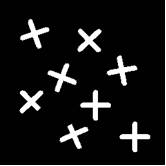
art8lab1.png: 
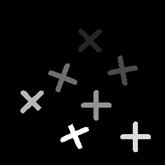
art8lab2.png: 
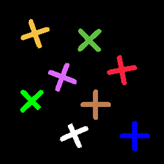
		

True

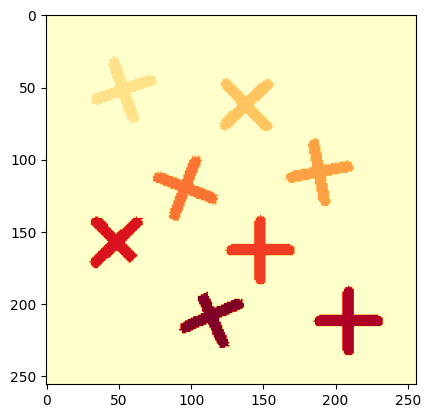

In [132]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from queue import LifoQueue


img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
imgH = img.shape[0];
imgW = img.shape[1];
imgRot = np.zeros((imgH,imgW))
vizinhanca = 8
label = 50
lista_proximos = LifoQueue()
whileC = 0

for i in range(0,imgH):
    for j in range(0, imgW):

        p = {"x": i, "y": j}

        if(img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
            imgRot[p["x"],p["y"]] = label
            lista_proximos.put(p)
            whileC = 0
            while not lista_proximos.empty():
                whileC +=1
                p_atual = lista_proximos.get()

                #ponto acima
                if p_atual["x"] > 0:
                    p_acima = {"x": p_atual["x"] -1, "y": p_atual["y"]}

                    if (img[p_acima["x"],p_acima["y"]] == 255) and (imgRot[p_acima["x"],p_acima["y"]] == 0):
                        imgRot[p_acima["x"],p_acima["y"]] = label
                        lista_proximos.put(p_acima)

                #ponto abaixo
                if p_atual["x"] < imgH - 1:
                    p_abaixo = {"x": p_atual["x"] + 1, "y": p_atual["y"]}

                    if (img[p_abaixo["x"],p_abaixo["y"]] == 255) and (imgRot[p_abaixo["x"],p_abaixo["y"]] == 0):
                        imgRot[p_abaixo["x"],p_abaixo["y"]] = label
                        lista_proximos.put(p_abaixo)
                    
                #ponto à esquerda
                if p_atual["y"] > 0:
                    p_esquerda = {"x": p_atual["x"], "y": p_atual["y"] - 1}

                    if (img[p_esquerda["x"],p_esquerda["y"]] == 255) and (imgRot[p_esquerda["x"],p_esquerda["y"]] == 0):
                        imgRot[p_esquerda["x"],p_esquerda["y"]] = label
                        lista_proximos.put(p_esquerda)
                
                #ponto à direita
                if p_atual["y"] < imgW - 1:
                    p_esquerda = {"x": p_atual["x"], "y": p_atual["y"] - 1}

                    if (img[p_esquerda["x"],p_esquerda["y"]] == 255) and (imgRot[p_esquerda["x"],p_esquerda["y"]] == 0):
                        imgRot[p_esquerda["x"],p_esquerda["y"]] = label
                        lista_proximos.put(p_esquerda)

                #se for vizinhança 8
                if(vizinhanca == 8):

                    #ponto à noroeste 
                    if (p_atual["x"] > 0) and (p_atual["y"] > 0):
                        p_noroeste = {"x": p_atual["x"] - 1, "y": p_atual["y"] - 1}
                        
                        if (img[p_noroeste["x"],p_noroeste["y"]] == 255) and (imgRot[p_noroeste["x"],p_noroeste["y"]] == 0):
                            imgRot[p_noroeste["x"],p_noroeste["y"]] = label
                            lista_proximos.put(p_noroeste)

                    #ponto à nordeste 
                    
                    if (p_atual["x"] > 0) and (p_atual["y"] < imgW - 1):
                        p_nordeste = {"x": p_atual["x"] - 1, "y": p_atual["y"] + 1}

                        if (img[p_nordeste["x"],p_nordeste["y"]] == 255) and (imgRot[p_nordeste["x"],p_nordeste["y"]] == 0):
                            imgRot[p_nordeste["x"],p_nordeste["y"]] = label
                            lista_proximos.put(p_nordeste)
                        
                    #ponto à sudoeste    
                    if (p_atual["x"] < imgH - 1) and (p_atual["y"] > 0):
                        p_sudoeste = {"x": p_atual["x"] + 1, "y": p_atual["y"] - 1}

                        if (img[p_sudoeste["x"],p_sudoeste["y"]] == 255) and (imgRot[p_sudoeste["x"],p_sudoeste["y"]] == 0):
                            imgRot[p_sudoeste["x"],p_sudoeste["y"]] = label
                            lista_proximos.put(p_sudoeste)

                    #ponto à sudeste    
                    if (p_atual["x"] < imgH - 1) and (p_atual["y"] < imgW - 1):
                        p_sudeste = {"x": p_atual["x"] + 1, "y": p_atual["y"] - 1}

                        if (img[p_sudeste["x"],p_sudeste["y"]] == 255) and (imgRot[p_sudeste["x"],p_sudeste["y"]] == 0):
                            imgRot[p_sudeste["x"],p_sudeste["y"]] = label
                            lista_proximos.put(p_sudeste)
            label = label + 30

# plt.imshow(imgRot, cmap='gray', vmin=0, vmax=255)
plt.imshow(imgRot, cmap='YlOrRd', vmin=0, vmax=255)
cv2.imwrite("art8Out.png", imgRot)

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

Componentes conexos =  234


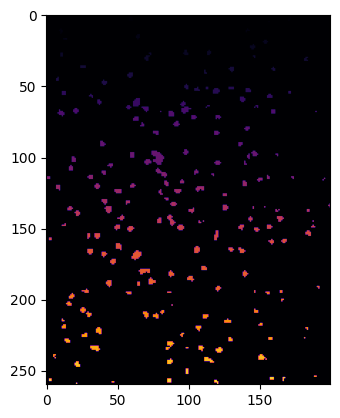

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from queue import LifoQueue

img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)

imgH = img.shape[0]
imgW = img.shape[1]

imgThr = np.zeros((imgH, imgW))
imgRot = np.zeros((imgH, imgW))

label = 1
vizinhanca = 8
threshold = 162
lista_proximos = LifoQueue()

#Binarizando a imagem
for i in range(0, imgH):
    for j in range(0, imgW):
        if(img[i,j] <= threshold):
            imgThr[i,j] = 255
        else:
            imgThr[i,j] = 0

#Componentes conexos
for i in range(0,imgH):
    for j in range(0, imgW):

        p = {"x": i, "y": j}

        if(imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
            imgRot[p["x"],p["y"]] = label
            lista_proximos.put(p)
            while not lista_proximos.empty():
                p_atual = lista_proximos.get()

                #ponto acima
                if p_atual["x"] > 0:
                    p_acima = {"x": p_atual["x"] -1, "y": p_atual["y"]}

                    if (imgThr[p_acima["x"],p_acima["y"]] == 255) and (imgRot[p_acima["x"],p_acima["y"]] == 0):
                        imgRot[p_acima["x"],p_acima["y"]] = label
                        lista_proximos.put(p_acima)

                #ponto abaixo
                if p_atual["x"] < imgH - 1:
                    p_abaixo = {"x": p_atual["x"] + 1, "y": p_atual["y"]}

                    if (imgThr[p_abaixo["x"],p_abaixo["y"]] == 255) and (imgRot[p_abaixo["x"],p_abaixo["y"]] == 0):
                        imgRot[p_abaixo["x"],p_abaixo["y"]] = label
                        lista_proximos.put(p_abaixo)
                    
                #ponto à esquerda
                if p_atual["y"] > 0:
                    p_esquerda = {"x": p_atual["x"], "y": p_atual["y"] - 1}

                    if (imgThr[p_esquerda["x"],p_esquerda["y"]] == 255) and (imgRot[p_esquerda["x"],p_esquerda["y"]] == 0):
                        imgRot[p_esquerda["x"],p_esquerda["y"]] = label
                        lista_proximos.put(p_esquerda)
                
                #ponto à direita
                if p_atual["y"] < imgW - 1:
                    p_esquerda = {"x": p_atual["x"], "y": p_atual["y"] - 1}

                    if (imgThr[p_esquerda["x"],p_esquerda["y"]] == 255) and (imgRot[p_esquerda["x"],p_esquerda["y"]] == 0):
                        imgRot[p_esquerda["x"],p_esquerda["y"]] = label
                        lista_proximos.put(p_esquerda)

                #se for vizinhança 8
                if(vizinhanca == 8):

                    #ponto à noroeste 
                    if (p_atual["x"] > 0) and (p_atual["y"] > 0):
                        p_noroeste = {"x": p_atual["x"] - 1, "y": p_atual["y"] - 1}
                        
                        if (imgThr[p_noroeste["x"],p_noroeste["y"]] == 255) and (imgRot[p_noroeste["x"],p_noroeste["y"]] == 0):
                            imgRot[p_noroeste["x"],p_noroeste["y"]] = label
                            lista_proximos.put(p_noroeste)

                    #ponto à nordeste 
                    
                    if (p_atual["x"] > 0) and (p_atual["y"] < imgW - 1):
                        p_nordeste = {"x": p_atual["x"] - 1, "y": p_atual["y"] + 1}

                        if (imgThr[p_nordeste["x"],p_nordeste["y"]] == 255) and (imgRot[p_nordeste["x"],p_nordeste["y"]] == 0):
                            imgRot[p_nordeste["x"],p_nordeste["y"]] = label
                            lista_proximos.put(p_nordeste)
                        
                    #ponto à sudoeste    
                    if (p_atual["x"] < imgH - 1) and (p_atual["y"] > 0):
                        p_sudoeste = {"x": p_atual["x"] + 1, "y": p_atual["y"] - 1}

                        if (imgThr[p_sudoeste["x"],p_sudoeste["y"]] == 255) and (imgRot[p_sudoeste["x"],p_sudoeste["y"]] == 0):
                            imgRot[p_sudoeste["x"],p_sudoeste["y"]] = label
                            lista_proximos.put(p_sudoeste)

                    #ponto à sudeste    
                    if (p_atual["x"] < imgH - 1) and (p_atual["y"] < imgW - 1):
                        p_sudeste = {"x": p_atual["x"] + 1, "y": p_atual["y"] - 1}

                        if (imgThr[p_sudeste["x"],p_sudeste["y"]] == 255) and (imgRot[p_sudeste["x"],p_sudeste["y"]] == 0):
                            imgRot[p_sudeste["x"],p_sudeste["y"]] = label
                            lista_proximos.put(p_sudeste)
            label = label + 1
print("Componentes conexos = ", label)
plt.imshow(imgRot, cmap='inferno', vmin=0, vmax=255)